In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('cali_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_hospitalized_patients', 'new_cases_2_lag', 'new_cases_4_lag', 'new_cases_50_std', 'dew_point', 'new_deaths_100_mean', 'new_deaths_7_lag', 'new_cases_350_lag', 'new_deaths_4_lag', 'new_deaths_50_lag', 'new_deaths_50_mean', 'new_cases_10_max', 'new_cases_3_lag', 'new_cases_150_lag', 'new_cases_50_lag', 'average_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_10_min', 'new_cases_7_lag', 'new_deaths_2_lag', 'current_intensive_care_patients', 'new_cases_30_lag', 'new_deaths_10_mean', 'relative_humidity', 'new_cases_1 lag', 'new_deaths_1_lag']]
covid_test = covid_test[['y', 'new_hospitalized_patients', 'new_cases_2_lag', 'new_cases_4_lag', 'new_cases_50_std', 'dew_point', 'new_deaths_100_mean', 'new_deaths_7_lag', 'new_cases_350_lag', 'new_deaths_4_lag', 'new_deaths_50_lag', 'new_deaths_50_mean', 'new_cases_10_max', 'new_cases_3_lag', 'new_cases_150_lag', 'new_cases_50_lag', 'average_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_10_min', 'new_cases_7_lag', 'new_deaths_2_lag', 'current_intensive_care_patients', 'new_cases_30_lag', 'new_deaths_10_mean', 'relative_humidity', 'new_cases_1 lag', 'new_deaths_1_lag']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:13255.27502	validation_1-rmse:58238.07360
[1]	validation_0-rmse:13135.25741	validation_1-rmse:58054.65669
[2]	validation_0-rmse:13016.44728	validation_1-rmse:57873.41745
[3]	validation_0-rmse:12898.79074	validation_1-rmse:57694.40229
[4]	validation_0-rmse:12782.31858	validation_1-rmse:57517.56143
[5]	validation_0-rmse:12667.03951	validation_1-rmse:57342.86802
[6]	validation_0-rmse:12552.89913	validation_1-rmse:57170.38284
[7]	validation_0-rmse:12439.91104	validation_1-rmse:57002.48562
[8]	validation_0-rmse:12328.05605	validation_1-rmse:56834.16118
[9]	validation_0-rmse:12217.34252	validation_1-rmse:56667.62462
[10]	validation_0-rmse:12107.78248	validation_1-rmse:56506.27939
[11]	validation_0-rmse:11999.25669	validation_1-rmse:56343.81789
[12]	validation_0-rmse:11891.90695	validation_1-rmse:56183.75185
[13]	validation_0-rmse:11785.52371	validation_1-rmse:56027.54469
[14]	validation_0-rmse:11680.31099	validation_1-rmse:55871.36939
[15]	validation_0-rmse:11576.01135	

[128]	validation_0-rmse:4485.81737	validation_1-rmse:45244.34100
[129]	validation_0-rmse:4450.88607	validation_1-rmse:45187.63877
[130]	validation_0-rmse:4416.24140	validation_1-rmse:45130.93072
[131]	validation_0-rmse:4381.95789	validation_1-rmse:45075.35584
[132]	validation_0-rmse:4348.02340	validation_1-rmse:45023.22795
[133]	validation_0-rmse:4314.66293	validation_1-rmse:44972.47771
[134]	validation_0-rmse:4281.31156	validation_1-rmse:44918.54768
[135]	validation_0-rmse:4248.56839	validation_1-rmse:44868.07377
[136]	validation_0-rmse:4216.03301	validation_1-rmse:44815.63726
[137]	validation_0-rmse:4183.81652	validation_1-rmse:44790.44961
[138]	validation_0-rmse:4151.82294	validation_1-rmse:44739.05503
[139]	validation_0-rmse:4119.91471	validation_1-rmse:44690.53685
[140]	validation_0-rmse:4088.31645	validation_1-rmse:44660.87423
[141]	validation_0-rmse:4057.13857	validation_1-rmse:44616.58235
[142]	validation_0-rmse:4026.19878	validation_1-rmse:44566.66811
[143]	validation_0-rmse:3

[255]	validation_0-rmse:1862.58554	validation_1-rmse:42174.09745
[256]	validation_0-rmse:1850.55463	validation_1-rmse:42162.71737
[257]	validation_0-rmse:1838.55436	validation_1-rmse:42151.31353
[258]	validation_0-rmse:1826.45108	validation_1-rmse:42140.02110
[259]	validation_0-rmse:1814.79343	validation_1-rmse:42128.95095
[260]	validation_0-rmse:1803.11743	validation_1-rmse:42117.73966
[261]	validation_0-rmse:1791.81156	validation_1-rmse:42106.86974
[262]	validation_0-rmse:1780.65925	validation_1-rmse:42095.94694
[263]	validation_0-rmse:1769.20912	validation_1-rmse:42085.06608
[264]	validation_0-rmse:1758.27147	validation_1-rmse:42074.31770
[265]	validation_0-rmse:1746.85149	validation_1-rmse:42063.55368
[266]	validation_0-rmse:1735.40641	validation_1-rmse:42052.76421
[267]	validation_0-rmse:1724.82736	validation_1-rmse:42042.24369
[268]	validation_0-rmse:1713.72388	validation_1-rmse:42031.80582
[269]	validation_0-rmse:1702.70649	validation_1-rmse:42021.44577
[270]	validation_0-rmse:1

[382]	validation_0-rmse:922.45195	validation_1-rmse:41217.31754
[383]	validation_0-rmse:918.15245	validation_1-rmse:41212.22781
[384]	validation_0-rmse:913.62714	validation_1-rmse:41205.57637
[385]	validation_0-rmse:909.07692	validation_1-rmse:41198.94789
[386]	validation_0-rmse:904.57808	validation_1-rmse:41192.37315
[387]	validation_0-rmse:900.20179	validation_1-rmse:41185.88324
[388]	validation_0-rmse:895.78433	validation_1-rmse:41179.66423
[389]	validation_0-rmse:891.39109	validation_1-rmse:41173.29651
[390]	validation_0-rmse:887.28615	validation_1-rmse:41167.20276
[391]	validation_0-rmse:882.97257	validation_1-rmse:41161.13129
[392]	validation_0-rmse:878.91437	validation_1-rmse:41155.18835
[393]	validation_0-rmse:874.90267	validation_1-rmse:41149.12044
[394]	validation_0-rmse:870.70708	validation_1-rmse:41142.85730
[395]	validation_0-rmse:866.75047	validation_1-rmse:41136.77752
[396]	validation_0-rmse:862.65712	validation_1-rmse:41130.91713
[397]	validation_0-rmse:858.76731	valida

[511]	validation_0-rmse:566.44963	validation_1-rmse:40719.92133
[512]	validation_0-rmse:565.14698	validation_1-rmse:40718.95950
[513]	validation_0-rmse:563.39246	validation_1-rmse:40718.05241
[514]	validation_0-rmse:562.09495	validation_1-rmse:40717.45157
[515]	validation_0-rmse:560.62021	validation_1-rmse:40716.43929
[516]	validation_0-rmse:558.90430	validation_1-rmse:40715.73347
[517]	validation_0-rmse:557.51470	validation_1-rmse:40714.79064
[518]	validation_0-rmse:555.83859	validation_1-rmse:40712.07321
[519]	validation_0-rmse:554.44683	validation_1-rmse:40709.33435
[520]	validation_0-rmse:553.08418	validation_1-rmse:40708.39816
[521]	validation_0-rmse:551.23261	validation_1-rmse:40705.59885
[522]	validation_0-rmse:549.60119	validation_1-rmse:40702.95157
[523]	validation_0-rmse:548.57428	validation_1-rmse:40696.52785
[524]	validation_0-rmse:547.54222	validation_1-rmse:40690.14724
[525]	validation_0-rmse:546.45781	validation_1-rmse:40683.79313
[526]	validation_0-rmse:545.46692	valida

[640]	validation_0-rmse:446.38647	validation_1-rmse:40136.42394
[641]	validation_0-rmse:445.64849	validation_1-rmse:40132.87930
[642]	validation_0-rmse:445.09236	validation_1-rmse:40129.40092
[643]	validation_0-rmse:444.29358	validation_1-rmse:40125.97911
[644]	validation_0-rmse:443.69207	validation_1-rmse:40122.58038
[645]	validation_0-rmse:442.88210	validation_1-rmse:40119.20572
[646]	validation_0-rmse:442.33871	validation_1-rmse:40115.79818
[647]	validation_0-rmse:441.56260	validation_1-rmse:40112.44514
[648]	validation_0-rmse:441.00728	validation_1-rmse:40109.07680
[649]	validation_0-rmse:440.53969	validation_1-rmse:40105.77435
[650]	validation_0-rmse:440.07881	validation_1-rmse:40102.48492
[651]	validation_0-rmse:439.57931	validation_1-rmse:40099.16895
[652]	validation_0-rmse:439.14463	validation_1-rmse:40095.90361
[653]	validation_0-rmse:438.39008	validation_1-rmse:40092.65260
[654]	validation_0-rmse:437.90042	validation_1-rmse:40089.38574
[655]	validation_0-rmse:437.45689	valida

[769]	validation_0-rmse:379.07531	validation_1-rmse:39810.50922
[770]	validation_0-rmse:378.79024	validation_1-rmse:39808.74102
[771]	validation_0-rmse:378.36615	validation_1-rmse:39806.95559
[772]	validation_0-rmse:378.07432	validation_1-rmse:39805.21054
[773]	validation_0-rmse:377.79272	validation_1-rmse:39803.47072
[774]	validation_0-rmse:377.50477	validation_1-rmse:39801.74124
[775]	validation_0-rmse:377.08289	validation_1-rmse:39799.99681
[776]	validation_0-rmse:376.80028	validation_1-rmse:39798.28315
[777]	validation_0-rmse:376.38512	validation_1-rmse:39796.55550
[778]	validation_0-rmse:376.07283	validation_1-rmse:39794.89294
[779]	validation_0-rmse:375.87365	validation_1-rmse:39793.20223
[780]	validation_0-rmse:375.46530	validation_1-rmse:39791.50280
[781]	validation_0-rmse:374.87396	validation_1-rmse:39789.82959
[782]	validation_0-rmse:374.62391	validation_1-rmse:39788.16991
[783]	validation_0-rmse:374.22184	validation_1-rmse:39786.49652
[784]	validation_0-rmse:374.00765	valida

[898]	validation_0-rmse:323.41080	validation_1-rmse:39716.69159
[899]	validation_0-rmse:323.08387	validation_1-rmse:39716.46621
[900]	validation_0-rmse:322.82168	validation_1-rmse:39716.51150
[901]	validation_0-rmse:322.61342	validation_1-rmse:39715.57877
[902]	validation_0-rmse:322.35135	validation_1-rmse:39715.60377
[903]	validation_0-rmse:321.54614	validation_1-rmse:39714.84156
[904]	validation_0-rmse:320.75224	validation_1-rmse:39714.08416
[905]	validation_0-rmse:320.24494	validation_1-rmse:39713.79803
[906]	validation_0-rmse:319.90577	validation_1-rmse:39713.66974
[907]	validation_0-rmse:319.65307	validation_1-rmse:39713.39635
[908]	validation_0-rmse:319.35218	validation_1-rmse:39713.16604
[909]	validation_0-rmse:318.97608	validation_1-rmse:39713.12414
[910]	validation_0-rmse:318.63482	validation_1-rmse:39712.10405
[911]	validation_0-rmse:318.18903	validation_1-rmse:39711.99319
[912]	validation_0-rmse:317.47681	validation_1-rmse:39711.97468
[913]	validation_0-rmse:317.16544	valida

[1026]	validation_0-rmse:277.95577	validation_1-rmse:39694.18168
[1027]	validation_0-rmse:277.71334	validation_1-rmse:39694.13951
[1028]	validation_0-rmse:277.43282	validation_1-rmse:39694.06533
[1029]	validation_0-rmse:277.01677	validation_1-rmse:39694.11506
[1030]	validation_0-rmse:276.54530	validation_1-rmse:39694.05229
[1031]	validation_0-rmse:276.18937	validation_1-rmse:39693.96767
[1032]	validation_0-rmse:275.91462	validation_1-rmse:39693.91062
[1033]	validation_0-rmse:275.56496	validation_1-rmse:39693.88524
[1034]	validation_0-rmse:275.12884	validation_1-rmse:39693.74885
[1035]	validation_0-rmse:274.78449	validation_1-rmse:39693.66266
[1036]	validation_0-rmse:274.57659	validation_1-rmse:39693.67945
[1037]	validation_0-rmse:273.88382	validation_1-rmse:39692.94689
[1038]	validation_0-rmse:273.64805	validation_1-rmse:39692.90960
[1039]	validation_0-rmse:273.30169	validation_1-rmse:39692.82545
[1040]	validation_0-rmse:273.03189	validation_1-rmse:39692.76776
[1041]	validation_0-rmse:

[1153]	validation_0-rmse:238.81189	validation_1-rmse:39677.22692
[1154]	validation_0-rmse:238.44951	validation_1-rmse:39677.37883
[1155]	validation_0-rmse:238.29425	validation_1-rmse:39677.32948
[1156]	validation_0-rmse:238.03087	validation_1-rmse:39676.67125
[1157]	validation_0-rmse:237.63954	validation_1-rmse:39676.57730
[1158]	validation_0-rmse:237.37976	validation_1-rmse:39675.93419
[1159]	validation_0-rmse:236.93508	validation_1-rmse:39676.21870
[1160]	validation_0-rmse:236.75390	validation_1-rmse:39676.22775
[1161]	validation_0-rmse:236.50530	validation_1-rmse:39676.21249
[1162]	validation_0-rmse:236.33274	validation_1-rmse:39676.20911
[1163]	validation_0-rmse:236.07764	validation_1-rmse:39675.57166
[1164]	validation_0-rmse:235.64399	validation_1-rmse:39675.85445
[1165]	validation_0-rmse:235.54437	validation_1-rmse:39675.28341
[1166]	validation_0-rmse:235.33912	validation_1-rmse:39675.27670
[1167]	validation_0-rmse:235.12123	validation_1-rmse:39675.28740
[1168]	validation_0-rmse:

[1280]	validation_0-rmse:207.57084	validation_1-rmse:39665.11749
[1281]	validation_0-rmse:207.30137	validation_1-rmse:39664.58382
[1282]	validation_0-rmse:207.11448	validation_1-rmse:39664.34454
[1283]	validation_0-rmse:207.01404	validation_1-rmse:39664.16590
[1284]	validation_0-rmse:206.80322	validation_1-rmse:39664.16611
[1285]	validation_0-rmse:206.48137	validation_1-rmse:39663.63016
[1286]	validation_0-rmse:206.09831	validation_1-rmse:39663.65510
[1287]	validation_0-rmse:205.90916	validation_1-rmse:39663.73773
[1288]	validation_0-rmse:205.76458	validation_1-rmse:39663.73160
[1289]	validation_0-rmse:205.53804	validation_1-rmse:39663.75510
[1290]	validation_0-rmse:205.31254	validation_1-rmse:39663.21753
[1291]	validation_0-rmse:205.17776	validation_1-rmse:39663.22458
[1292]	validation_0-rmse:204.76131	validation_1-rmse:39663.19356
[1293]	validation_0-rmse:204.64982	validation_1-rmse:39663.24558
[1294]	validation_0-rmse:204.23930	validation_1-rmse:39663.17816
[1295]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

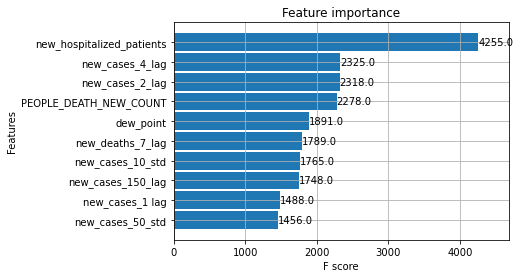

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

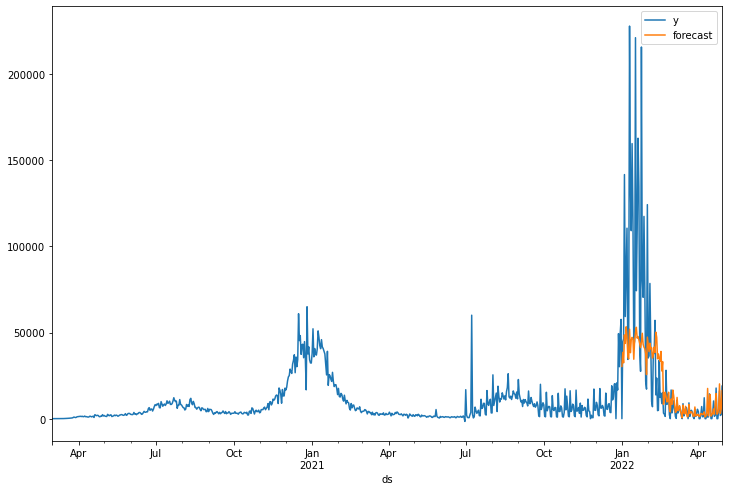

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

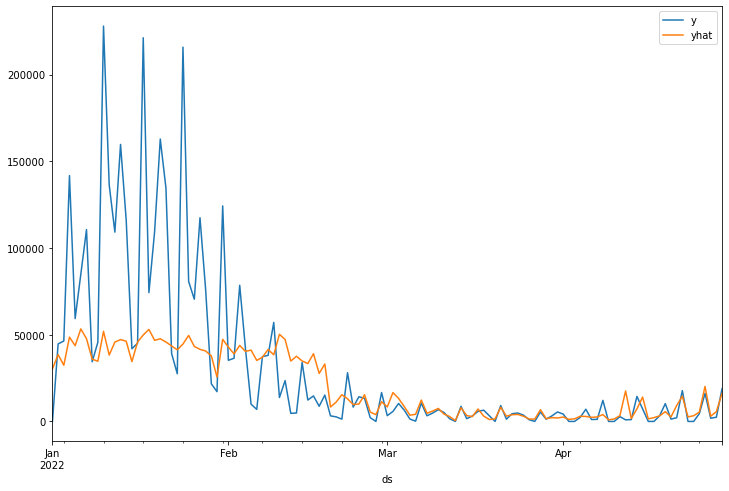

In [22]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [9]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  39656.33288921138
Test MAE:  19005.78579455464
MASE =  0.8125709148159727


In [13]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

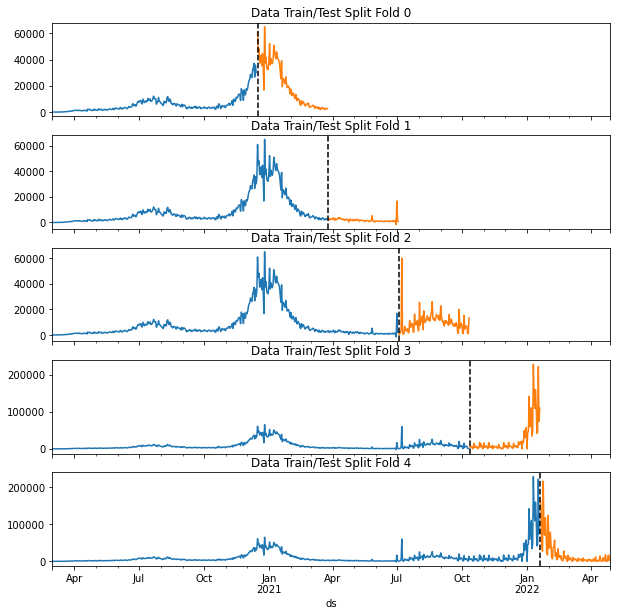

In [15]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [18]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_df):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[21:28:34] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13257.58614	validation_1-rmse:58249.04660
[100]	validation_0-rmse:5930.12180	validation_1-rmse:46696.92633
[200]	validation_0-rmse:3363.85007	validation_1-rmse:41452.12162
[300]	validation_0-rmse:2456.28339	validation_1-rmse:39378.29439
[400]	validation_0-rmse:2041.52510	validation_1-rmse:38629.40588
[500]	validation_0-rmse:1811.89716	validation_1-rmse:38193.98655
[600]	validation_0-rmse:1710.08243	validation_1-rmse:37571.26138
[700]	validation_0-rmse:1623.18073	validation_1-rmse:37134.53557
[800]	validation_0-rmse:1541.20615	validation_1-rmse:36841.78888
[900]	validation_0-rmse:1471.08639	validation_1-rmse:36695.65359
[999]	validation_0-rmse:1409.15393	validation_1-rmse:36539.27768
[21:28:35] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:

<AxesSubplot:xlabel='ds'>

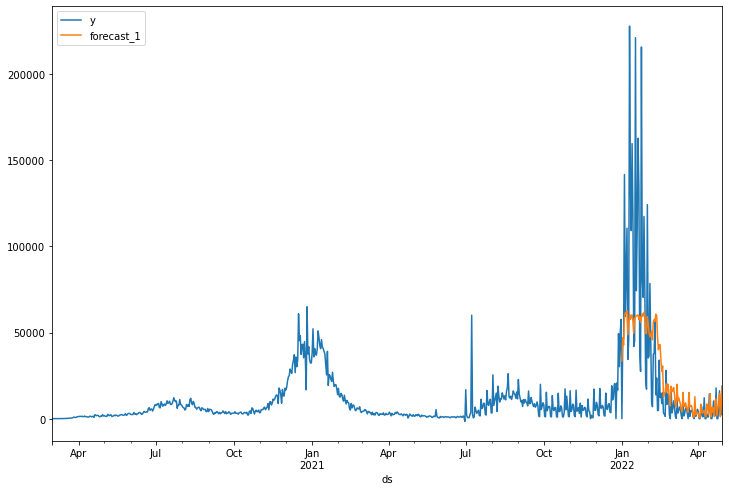

In [19]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

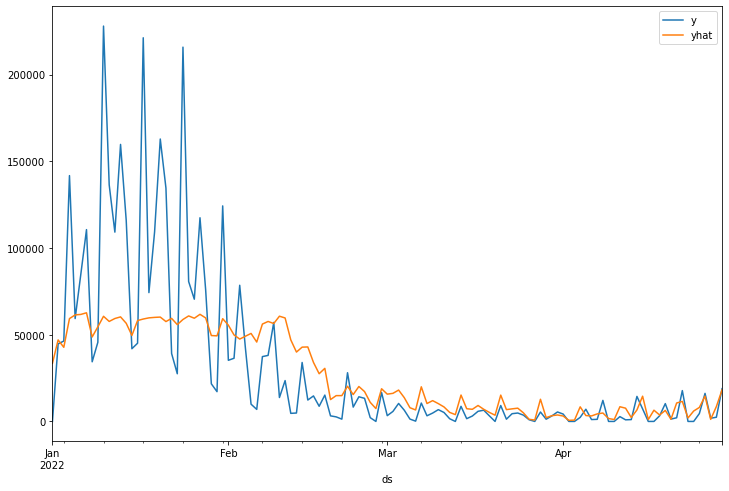

In [21]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [20]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  39656.33288921138
Test MAE:  19005.78579455464
MASE =  0.8125709148159727
